In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.applications import VGG16, InceptionV3, ResNet50,MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
training_set=tf.keras.utils.image_dataset_from_directory(
'Indian Food Images/train',
labels='inferred',
label_mode='categorical',
class_names=None,
color_mode='rgb',
batch_size=32,
image_size=(64,64),
interpolation='bilinear')

Found 2800 files belonging to 80 classes.


In [3]:
validation=tf.keras.utils.image_dataset_from_directory(
'Indian Food Images/eval',
labels='inferred',
label_mode='categorical',
class_names=None,
color_mode='rgb',
batch_size=32,
image_size=(64,64),
interpolation='bilinear')

Found 600 files belonging to 80 classes.


In [4]:
cnn=tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\HP\anaconda3\envs\Sarvagya\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [7]:
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Flatten())

In [8]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=80,activation='softmax'))

In [9]:

cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
training=cnn.fit(x=training_set,validation_data=validation,epochs=20)

Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 15s 168ms/step - accuracy: 0.9438 - loss: 0.4856 - val_accuracy: 0.1917 - val_loss: 14.6973
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 14s 164ms/step - accuracy: 0.9634 - loss: 0.3166 - val_accuracy: 0.1950 - val_loss: 14.4343
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 15s 167ms/step - accuracy: 0.9514 - loss: 0.4106 - val_accuracy: 0.2000 - val_loss: 13.7665
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.9637 - loss: 0.2563 - val_accuracy: 0.1967 - val_loss: 15.1040
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 15s 173ms/step - accuracy: 0.9603 - loss: 0.2792 - val_accuracy: 0.1817 - val_loss: 12.8053
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - accuracy: 0.9535 - loss: 0.3375 - val_accuracy: 0.2050 - val_loss: 13.0662
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 15s 173ms/step - accuracy: 0.9575 - loss: 0.3323 - val_accuracy: 0.2017 - val_loss: 14.4259
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 16s 179ms/step - accuracy: 0.9569 - loss: 0.3635 - v

In [17]:
training.history

{'accuracy': [0.9485714435577393,
  0.9503571391105652,
  0.9503571391105652,
  0.9596428275108337,
  0.9610714316368103,
  0.9510714411735535,
  0.9592857360839844,
  0.9596428275108337,
  0.9539285898208618,
  0.9578571319580078,
  0.9474999904632568,
  0.9567857384681702,
  0.9567857384681702,
  0.9553571343421936,
  0.9578571319580078,
  0.9592857360839844,
  0.9557142853736877,
  0.9557142853736877,
  0.9578571319580078,
  0.9560714364051819],
 'loss': [0.4248853027820587,
  0.3782239556312561,
  0.3903542757034302,
  0.30135056376457214,
  0.28769782185554504,
  0.44364917278289795,
  0.28618037700653076,
  0.30536946654319763,
  0.38528668880462646,
  0.3266671895980835,
  0.45691734552383423,
  0.32592326402664185,
  0.3899232745170593,
  0.4109421968460083,
  0.37229955196380615,
  0.3460550904273987,
  0.35674363374710083,
  0.4485204219818115,
  0.375900000333786,
  0.4113062024116516],
 'val_accuracy': [0.19166666269302368,
  0.19499999284744263,
  0.20000000298023224,
  0.

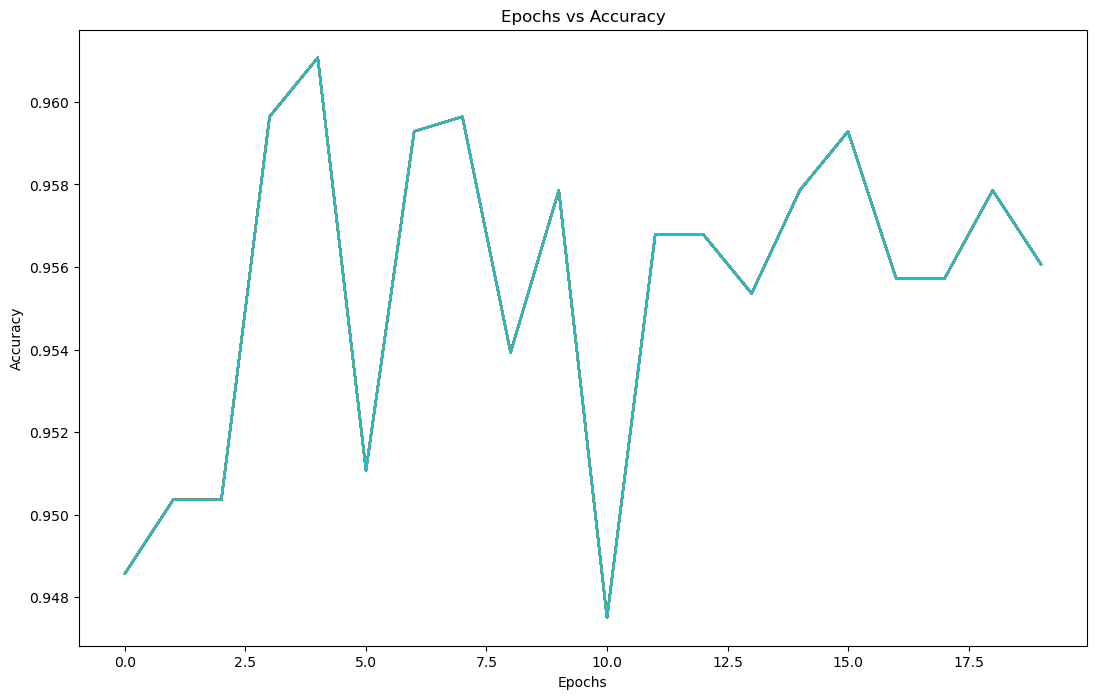

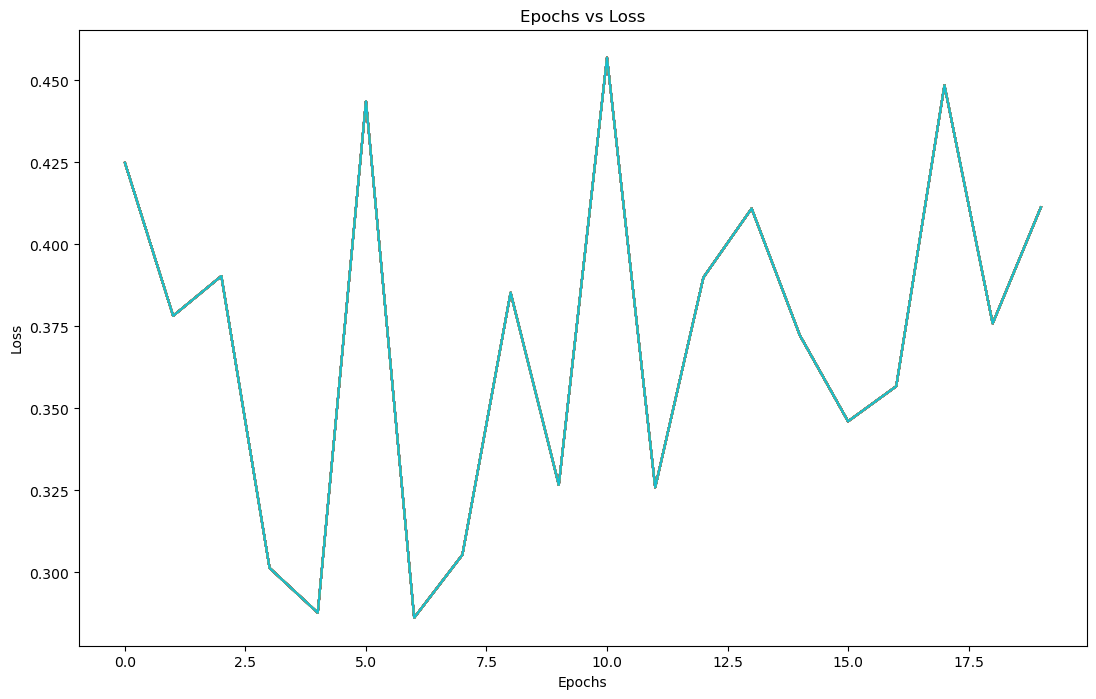

In [18]:
plt.figure(figsize=(13,8))
for i in range(30):
    plt.plot(training.history['accuracy'])
    plt.title('Epochs vs Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
plt.figure(figsize=(13,8))
for i in range(30):
    plt.plot(training.history['loss'])
    plt.title('Epochs vs Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

In [19]:
test_set=tf.keras.utils.image_dataset_from_directory(
'Indian Food Images/test',
labels='inferred',
label_mode='categorical',
class_names=None,
color_mode='rgb',
batch_size=32,
image_size=(64,64),
interpolation='bilinear')

Found 600 files belonging to 80 classes.


In [24]:
test_loss,test_ac=cnn.evaluate(test_set,verbose=2)

19/19 - 1s - 55ms/step - accuracy: 0.1983 - loss: 17.9737
